Classify the Email using the binary classification method.Email spam detection has two states :a)Normal State Not Spam, b)Abnormal State Spam .Use K-Nearest Neighbours and Support Vector Machine for classification.Analyze their performance.

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv('emails.csv')

In [4]:
df

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1


In [5]:
df.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [7]:
X=df.iloc[:,1:3001]
X

,the,to,ect,and,for,of,a,you,hou,in,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,2,2,2,3,0,0,32,0,0,5,...,0,0,0,0,0,0,0,0,0,0
5168,35,27,11,2,6,5,151,4,3,23,...,0,0,0,0,0,0,0,0,1,0
5169,0,0,1,1,0,0,11,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5170,2,7,1,0,2,1,28,2,0,8,...,0,0,0,0,0,0,0,0,1,0


In [8]:
Y=df.iloc[:,-1].values
Y
#This selects all rows and last column

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

<Axes: ylabel='count'>

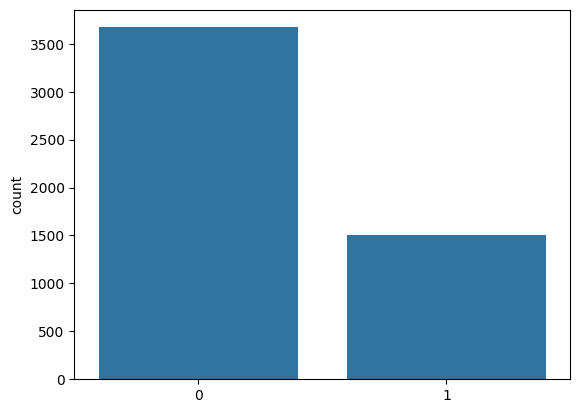

In [29]:
#Check the Balance of the dataset
import seaborn as sns
sns.countplot(x=Y)

In [32]:
from sklearn.preprocessing import scale
X=scale(X)

In [33]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

KNN CLASSIFICATION

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn=KNeighboursClassifier(n_neighbors=7)

In [37]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [38]:
y_pred=knn.predict(x_test)

In [39]:
print(y_pred)

[1 0 0 ... 1 0 1]


In [40]:
#Evaluation metrics
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score,classification_report

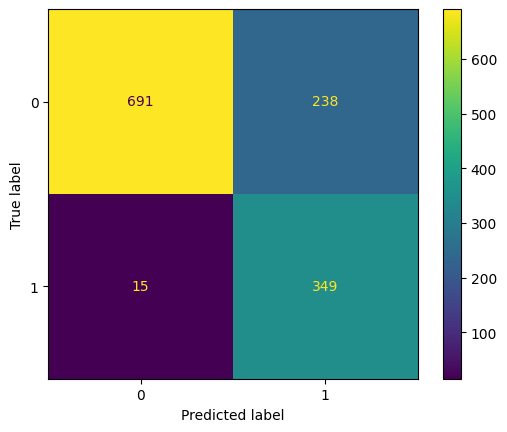

In [41]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [43]:
accuracy_score(y_test,y_pred)

0.8043310131477185

In [44]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.74      0.85       929
           1       0.59      0.96      0.73       364

    accuracy                           0.80      1293
   macro avg       0.79      0.85      0.79      1293
weighted avg       0.87      0.80      0.81      1293



In [47]:
import numpy as np

In [48]:
#FIND THE BEST VALUE FOR K
error=[]
for k in range(1,41):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    error.append(np.mean(y_pred!=y_test))

In [49]:
error

[0.1136890951276102,
 0.102861562258314,
 0.1531322505800464,
 0.13843774168600154,
 0.16395978344934262,
 0.1585460170146945,
 0.1956689868522815,
 0.18793503480278423,
 0.2211910286156226,
 0.21809744779582366,
 0.24207269914926527,
 0.23665893271461716,
 0.2660479505027069,
 0.2637277648878577,
 0.28074245939675174,
 0.2791956689868523,
 0.29156999226604796,
 0.2923433874709977,
 0.3047177107501933,
 0.3039443155452436,
 0.31322505800464034,
 0.31245166279969067,
 0.32637277648878577,
 0.3271461716937355,
 0.33642691415313225,
 0.3333333333333333,
 0.34416086620262953,
 0.3433874709976798,
 0.35730858468677495,
 0.3534416086620263,
 0.3619489559164733,
 0.36040216550657383,
 0.3720030935808198,
 0.3704563031709203,
 0.37819025522041766,
 0.37587006960556846,
 0.3866976024748647,
 0.3805104408352668,
 0.38979118329466356,
 0.3882443928847641]

In [50]:
#ERROR IS LEAST WHEN K=2

In [51]:
#lets take k=2
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
accuracy_score(y_test,y_pred)

0.897138437741686

SVM

In [52]:
from sklearn.svm import SVC

In [63]:
#TESTING THE ACCURACY ON THREE DIFFERENT KERNELS

In [61]:
svm=SVC(kernel='rbf')

In [62]:
svm.fit(x_train,y_train)

SVC()

In [64]:
y_pred=svm.predict(x_test)

In [65]:
accuracy_score(y_pred,y_test)

0.9327146171693735

In [66]:
#linear = 0.9505027068832174
#poly =0.7501933488012374
#rbf=0.9327146171693735
